# Effects of sample size

In [972]:
using BSON
using PrettyTables
using Statistics
using DataFrames
using Plots
using KernelDensity

function res_fun(PATH, true_pars, verbose=:false)
    out = BSON.load(PATH)
    est = out["beta_hat"];
    fit = out["fitness"]
    if verbose==true
        for i = 1:size(est)[1]
            println("Pars: ", round.(est[i,:], digits=2), " Fitness: ", round.(fit[i], digits=2))
            sleep(0.1)
        end
    end
    bw = out["bw"]

    bias = mean(est, dims=1) -true_pars'

    MSE = sqrt.(mean((est .- true_pars').^2, dims=1))
    m_h = mean(bw, dims=1)

    pars10 = ["b11u", "b12u", "b21u", "b22u", "b11d", "b12d", "b21d", "b13u", "b33d", "eqsel", "llike"];
    est = hcat(est, fit);

    est_df = DataFrame(est, pars10);
    return est_df, bias, MSE, m_h 
end

formatter = (v, i, j) -> round(v, digits = 2);

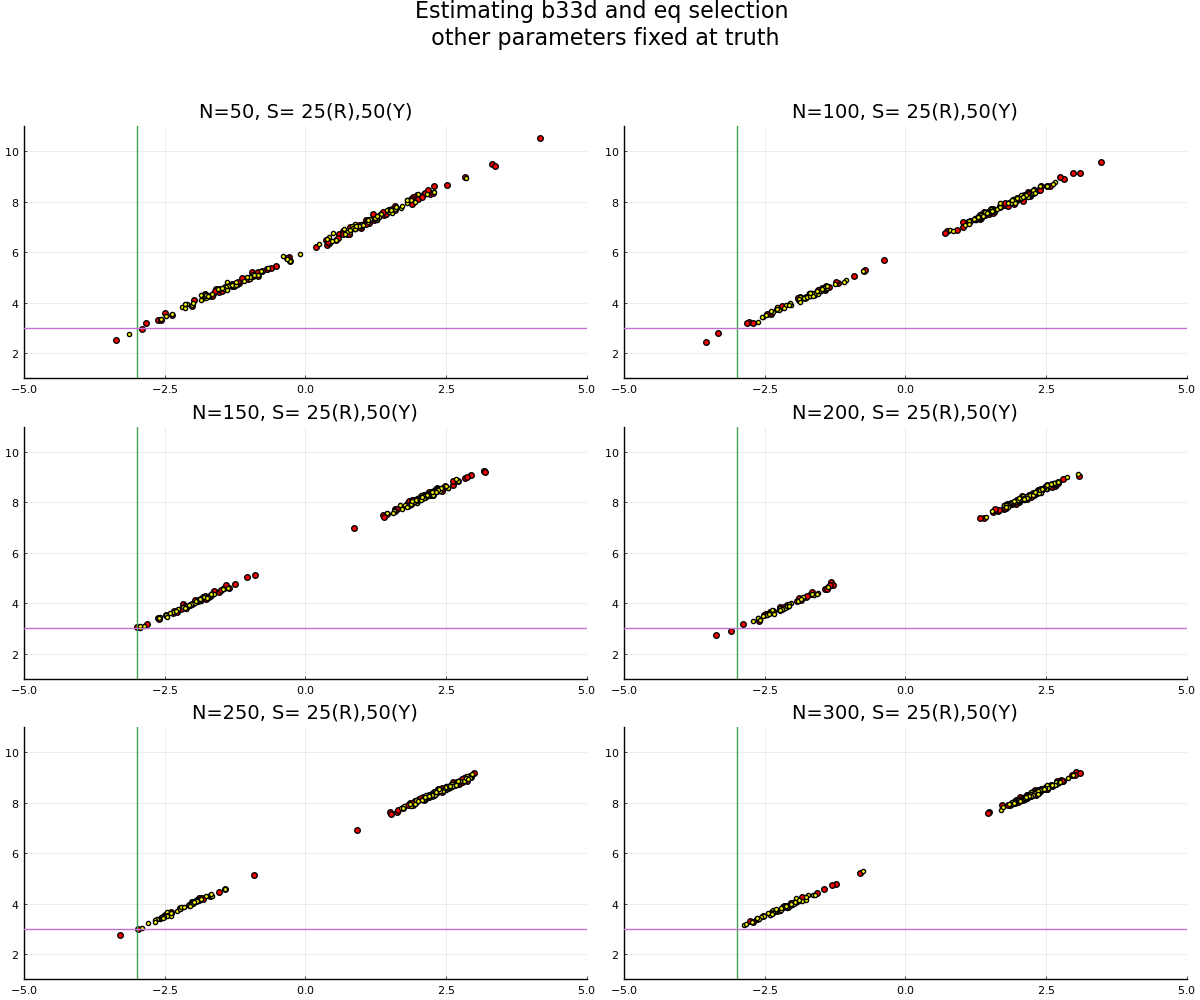

In [977]:
p_vec = []
for N = 50:50:300
    S=25
    path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =4,legends=false,color=:red, title="N=$(N), S= 25(R),50(Y)" )
    S=50
    path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
    vline!([-3.])
    hline!([3.])
    push!(p_vec,pl )
end

plot(p_vec[1],p_vec[2],p_vec[3],p_vec[4],p_vec[5],p_vec[6], layout= (3,2), xlims = (-5,5), ylims = (1,11),size = (1200,1000),
            plot_title = "Estimating b33d and eq selection \n other parameters fixed at truth ")



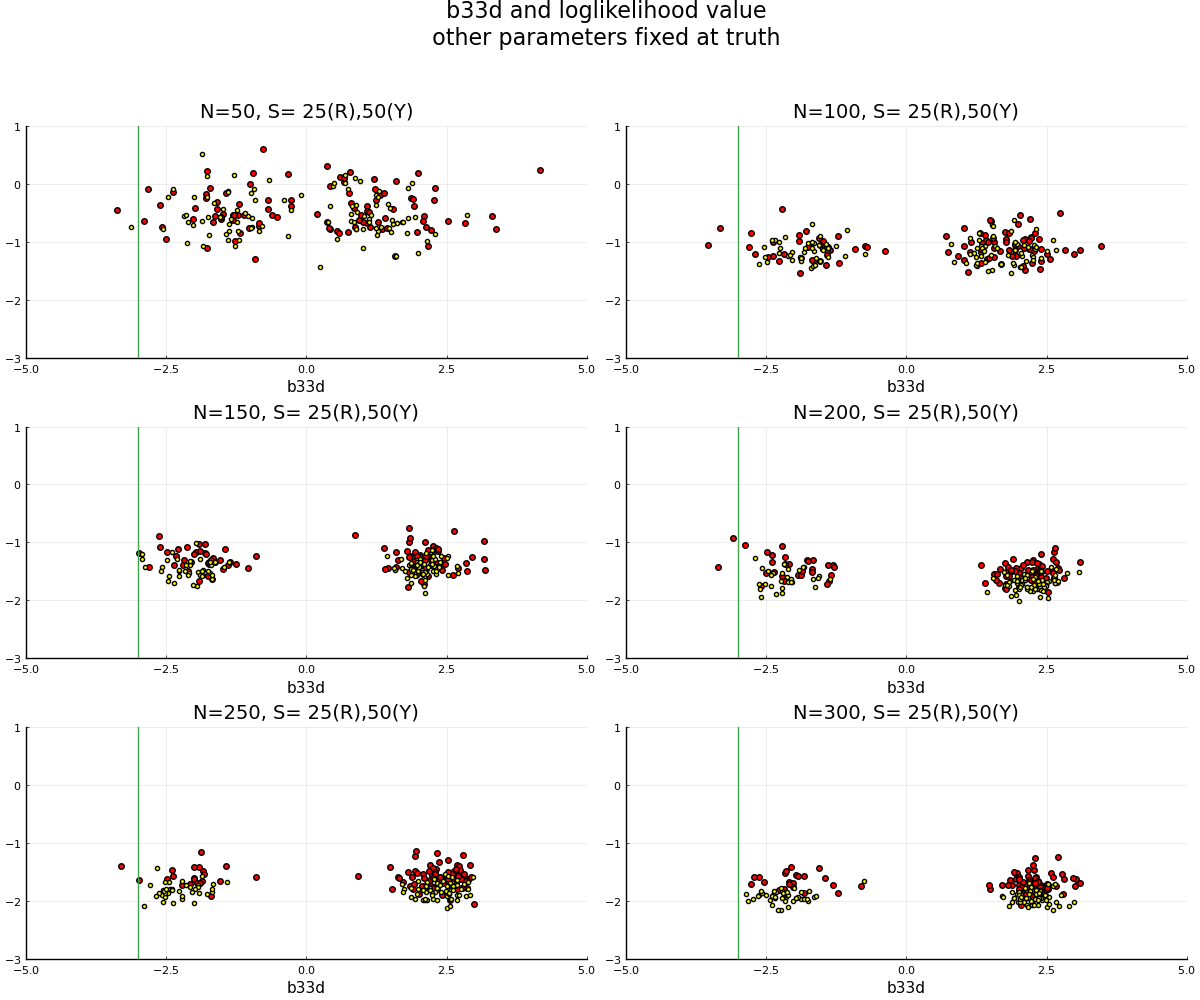

In [1038]:
p_vec = []
for N = 50:50:300
    S=25
    path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,3], markersize =4,legends=false,color=:red, title="N=$(N), S= 25(R),50(Y)" )
    S=50
    path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,3], markersize =3,legends=false,color=:yellow )
    vline!([-3.])
    hline!([3.])
    push!(p_vec,pl )
end

plot(p_vec[1],p_vec[2],p_vec[3],p_vec[4],p_vec[5],p_vec[6], layout= (3,2), xlabel = "b33d", xlims = (-5,5), ylims = (-3,1),size = (1200,1000),
            plot_title = " b33d and loglikelihood value \n other parameters fixed at truth ")



In [969]:
function fetch_res(N,S,path)
    res=BSON.load(path)
    est= reduce(hcat,res["beta_hat"]')
    # println(est)
    best_est= zeros(100, 3) 

    for i =1:100
        best_est[i, :]=  est[:,i]
    end
    best_est = DataFrame(best_est, ["b33d", "eqsel", "fit"]);
    return best_est
end


function fetch_res2(N,S,path)
    res=BSON.load(path)
    est= reduce(vcat,res["beta_hat"])
    # println(est)
    best_est = DataFrame(est, ["b33d", "eqsel", "fit"]);
    return best_est
end


# pretty_table(best_est, formatters = formatter, show_row_number=true) # displaying 10 estimations

fetch_res2 (generic function with 1 method)

# Changing the price bandwidth does not change the the result

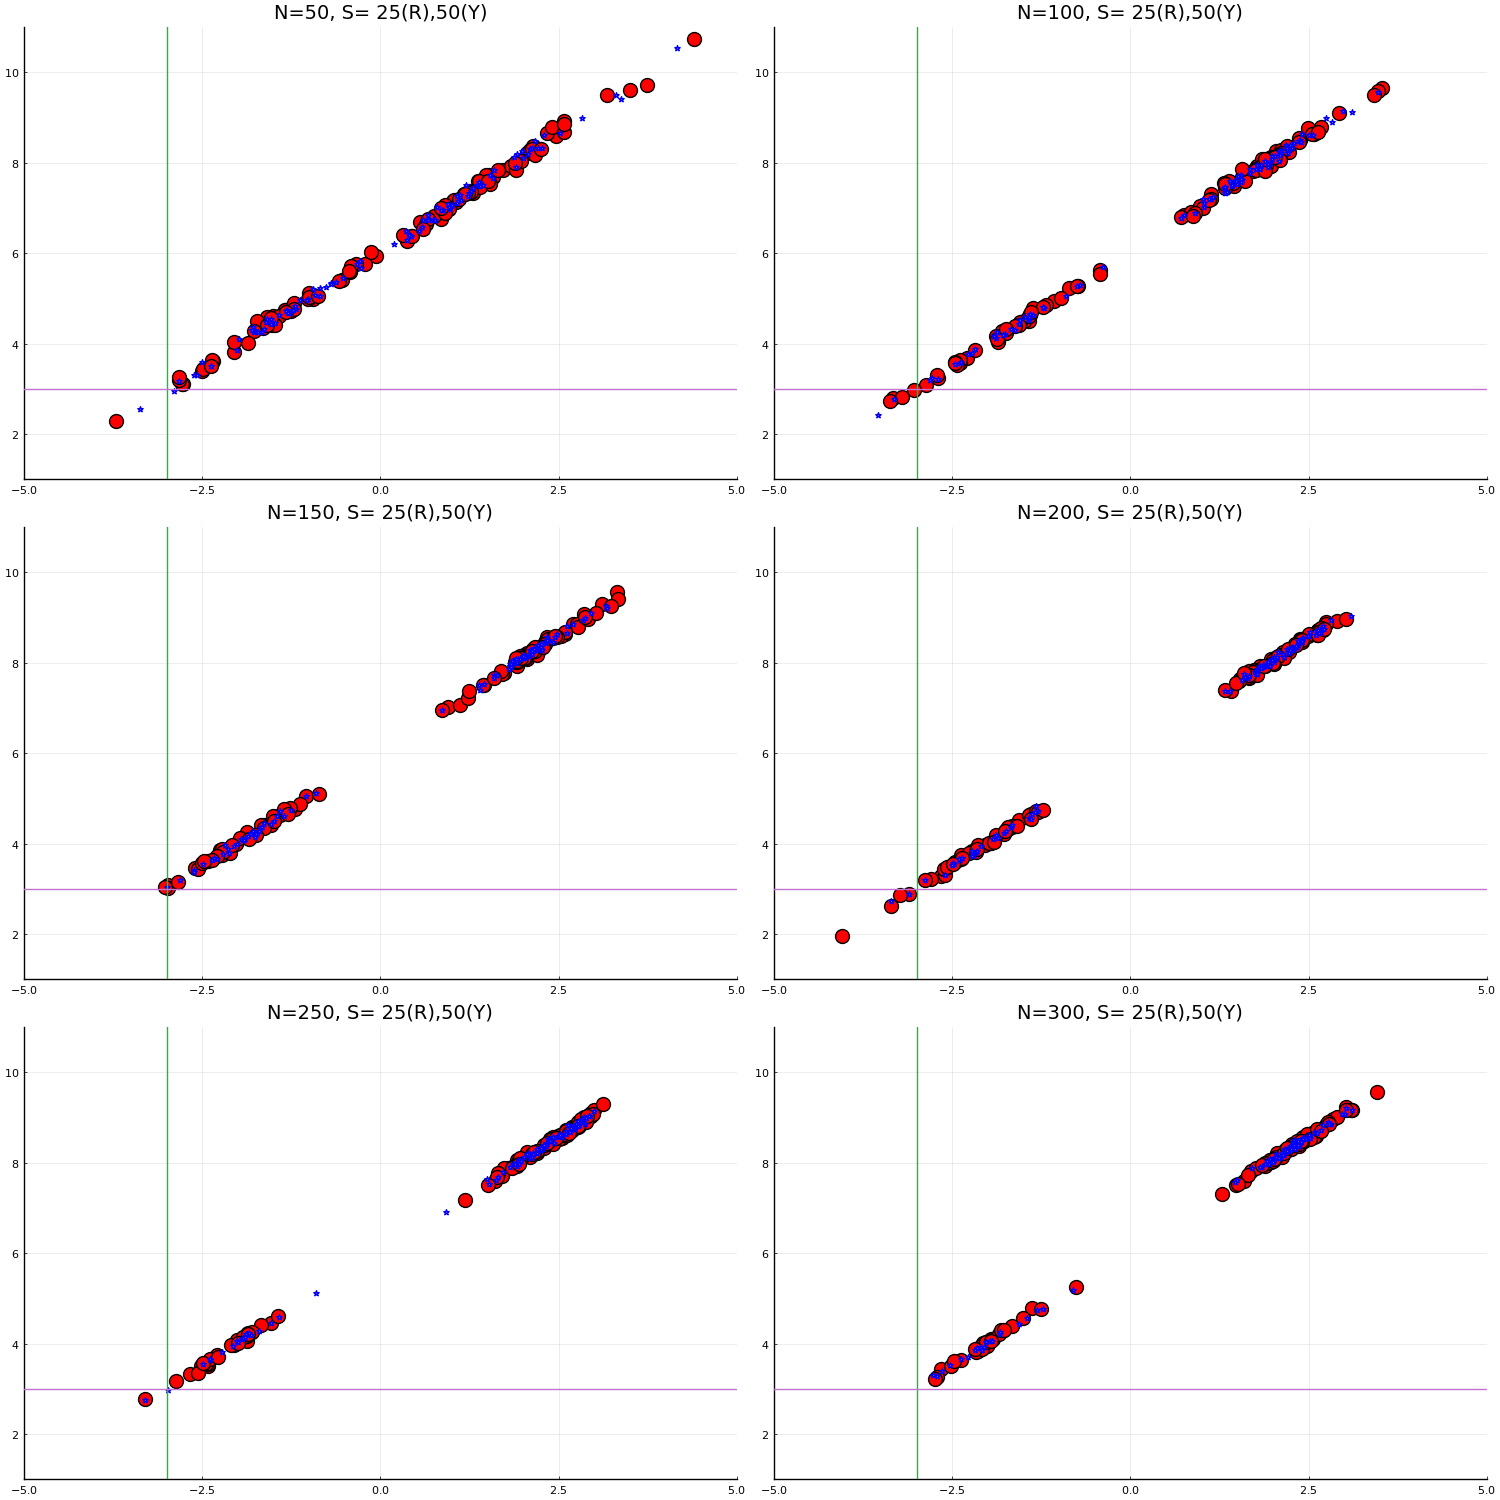

In [762]:
p_vec = []
for N = 50:50:300
    S=25
    path="/Users/amir/out/rest-2p_half_price/est_$(N)_sim_$(S)_9-10.bson"
    pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =10,legends=false,markerstrokecolor=:black, color=:red, title="N=$(N), S= 25(R),50(Y)" )
#     S=50
    path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =4,legends=false, markerstrokecolor=:blue , markershape=:star)
    push!(p_vec,pl )
    vline!([-3.])
    hline!([3.])
end

plot(p_vec[1],p_vec[2],p_vec[3],p_vec[4],p_vec[5],p_vec[6], layout= (3,2), xlims = (-5,5), ylims = (1,11), size=(1500,1500))



# Estimation with Limited Data

I consider a design with $N=100,300,500$, $S=50$, and $100$ replications. I vary the bandwidth for the characteristics of the equilibrium partner to half, equal, and $1.5$ times the baseline bandwidth selection rule.  The price bandwidth is equal to the baseline bandwidth in all MCs. 

For each sample size $N$ and the choice of bandwidth, I consider two different data scenarios. One where only prices are available and the second one where we have access to both the prices and the equilibrium matching. The case with prices alone can be thought of as the situation where the equilibrium transfer is disclosed but the characteristics of the equilibrium partner are not. 

In [1106]:
D=3; BW=1.0; N=500;

path="/Users/amir/out/limited_data/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
cor(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2])


0.9998977365025017

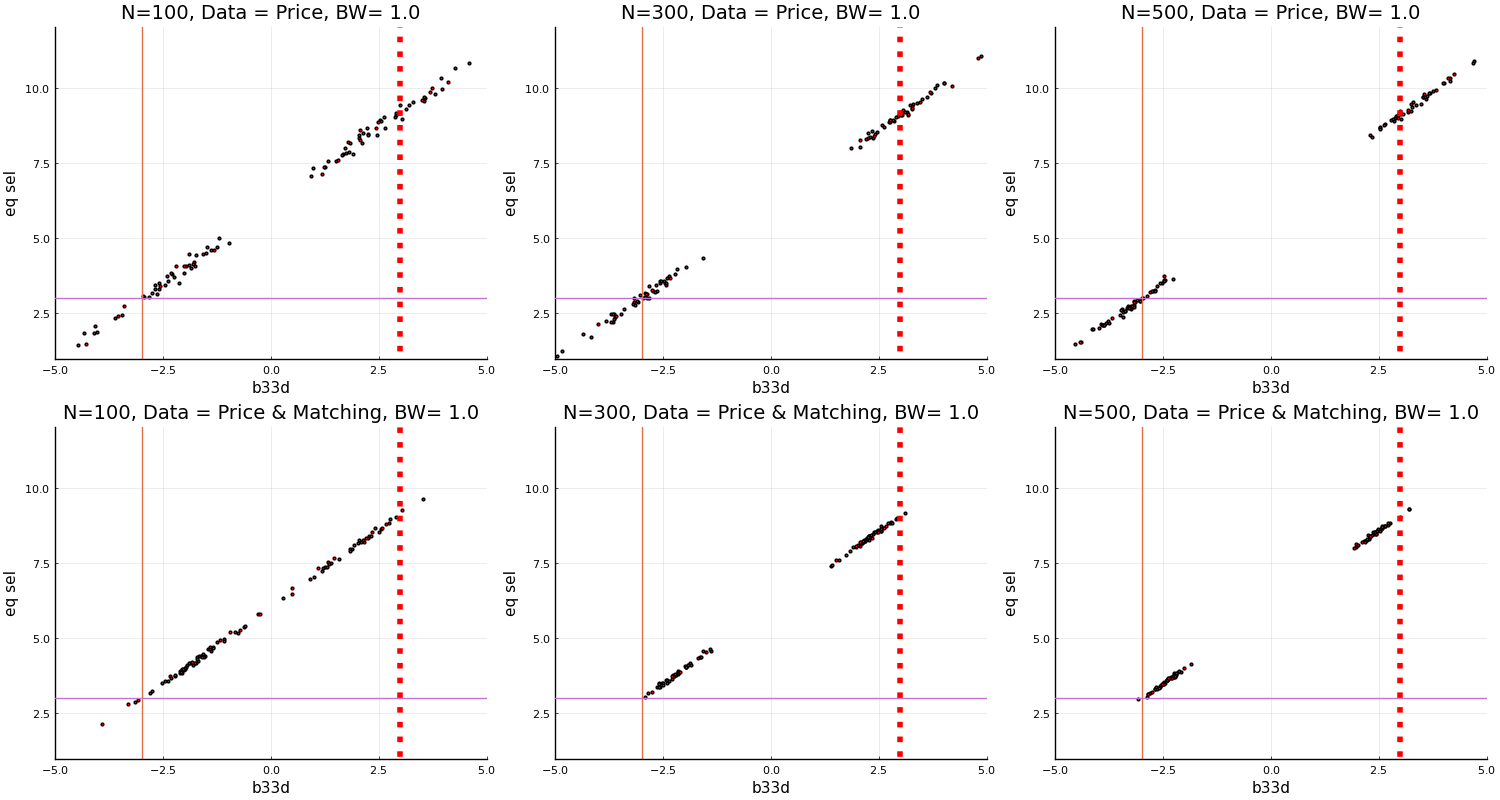

In [1103]:
BW=1.0
D=1
p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]

for D=1:2:3
    for BW = 1:0.5:1.
        for N = 100:200:500
            path="/Users/amir/out/limited_data/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
            pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =2,legends=false,color=:red, title="N=$(N), Data = $(data_label[D]), BW= $(BW)", xlabel = "b33d", ylabel="eq sel" )
        #     S=50
        #     path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
        #     pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
            vline!([-3.])
        vline!([3.], linestyle=:dot, linewidth = 4, color =:red, label="")
            hline!([3.])
            push!(p_vec,pl )
        end
    end 
end


plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6], layout= (2,3), xlims = (-5,5), ylims = (1,12),size = (1500,800))



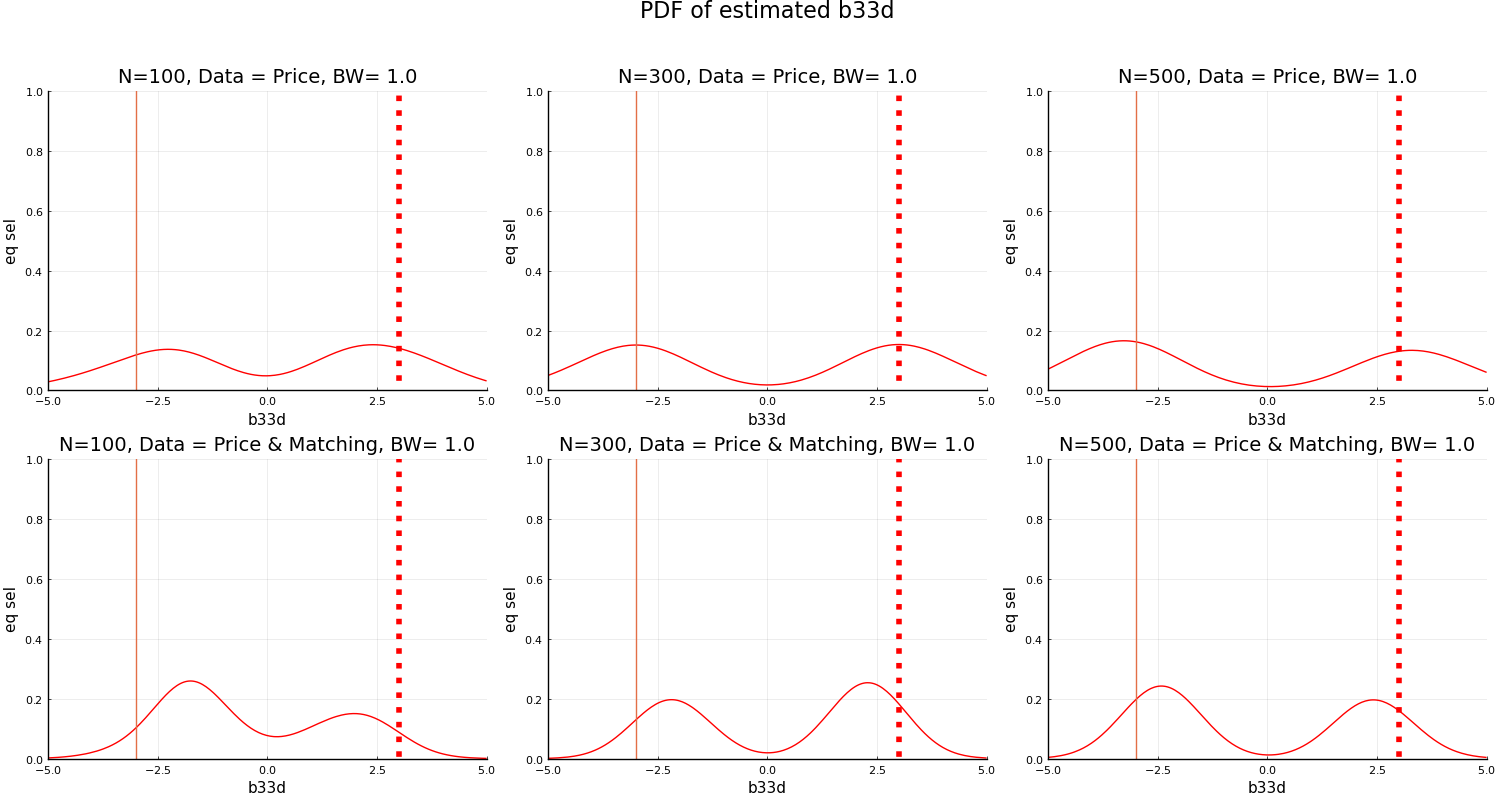

In [1054]:
BW=1.0
D=1
p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]

for D=1:2:3
    for BW = 1:0.5:1.
        for N = 100:200:500
            path="/Users/amir/out/limited_data/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
#             pl= scatter(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =2,legends=false,color=:red, title="N=$(N), Data = $(data_label[D]), BW= $(BW)", xlabel = "b33d", ylabel="eq sel" )
            pl = plot(x->pdf(kde(fetch_res(10,10,path)[:,1]), x), -5,5, color= :red, legends=false, title="N=$(N), Data = $(data_label[D]), BW= $(BW)", xlabel = "b33d", ylabel="eq sel" )

        #     S=50
        #     path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
        #     pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
            vline!([-3.])
        vline!([3.], linestyle=:dot, linewidth = 4, color =:red, label="")
            hline!([3.])
            push!(p_vec,pl )
        end
    end 
end


plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6], layout= (2,3), xlims = (-5,5), ylims = (0,1),size = (1500,800), plot_title="PDF of estimated b33d")





# Adding a third Parameter: $\beta_{11}^u$ in addition to the equilibrium selection rule and $\beta_{33}^d$


In [1055]:

function fetch_res3p(path)
    res=BSON.load(path)
    est= reduce(vcat,res["beta_hat"])
    best_est = DataFrame(est, ["b11u","b33d", "eqsel", "fit"]);
    return best_est
end

D=3
p_vec = []
for BW = 1.:5:1.
    for N in [50, 100, 200]
        path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/limited_data_3p//est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl= scatter(fetch_res3p(path)[:,3],fetch_res3p(path)[:,4], markersize =2,legends=false,color=:red, title="N=$(N), Data = $(D)" )
    #     S=50
    #     path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    #     pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
#         vline!([-2.5])
#         hline!([-3])
        push!(p_vec,pl )
    end
end 


# Plotting $\beta_{11}^u$ versus the value of the log likelihood

In [ ]:
D=3; BW=1.0; N=500;
path="/Users/amir/out/limited_data_3p/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"


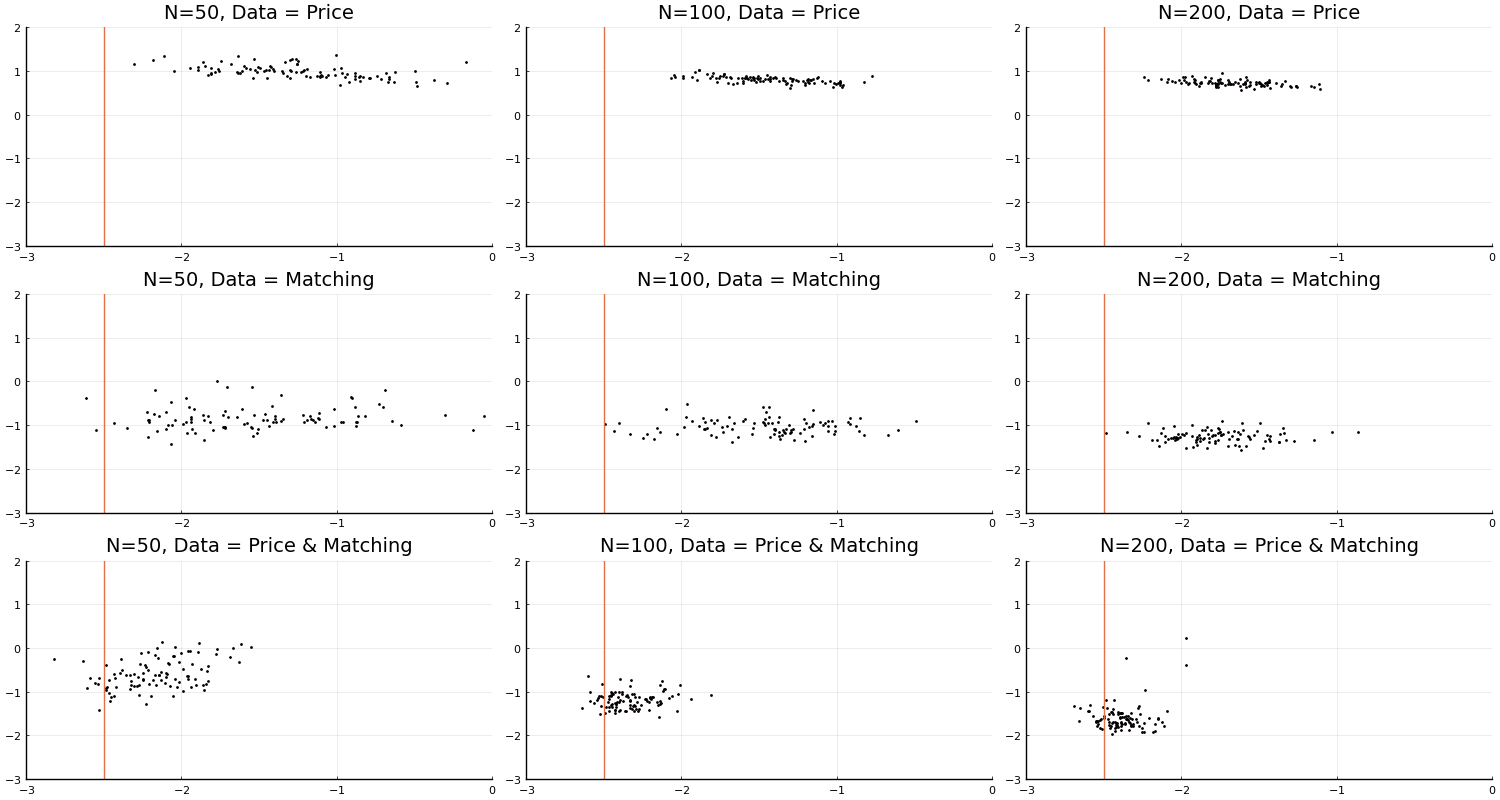

In [1061]:

p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]

for D = 1:1:3
    for N in [50, 100,200]
#         path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/limited_data_3p/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        path="/Users/amir/out/limited_data_3p/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl= scatter(fetch_res3p(path)[:,1],fetch_res3p(path)[:,4], markersize =1,legends=false,color=:red, title="N=$(N), Data = $(data_label[D])" )
    #     S=50
    #     path="/Users/amir/out/rest-2p/est_$(N)_sim_$(S)_9-10.bson"
    #     pl = scatter!(fetch_res(N,S,path)[:,1],fetch_res(N,S,path)[:,2], markersize =3,legends=false,color=:yellow )
        vline!([-2.5])
        hline!([3])
        push!(p_vec,pl )
    end
end 
# plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6] , layout= (3,2), xlims=(-4,0), ylims=(1,11))
# , ylims=(-10,10), xlims=(-4,0))

plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6],p_vec[7], p_vec[8], p_vec[9] , layout= (3,3), ylims=(-3,2), xlims=(-3,0), size= (1500,800))
# , xlims = (-5,5), ylims = (1,11),size = (1500,800))




# PDF of estimates 


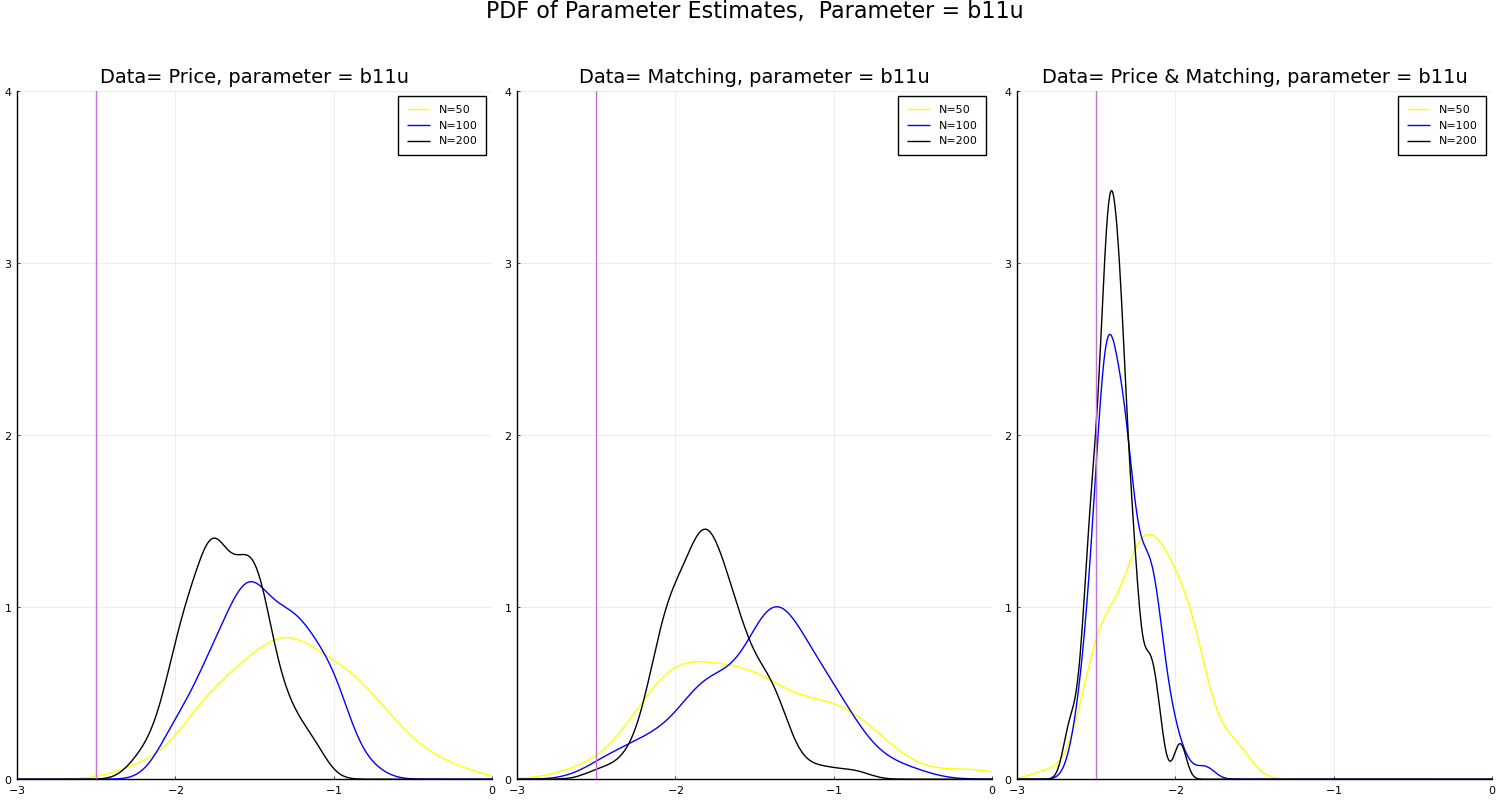

In [1067]:
data_label = ["Price", "Matching", "Price & Matching"]

p_vec = []
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p/est_50_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(fetch_res3p(path)[:,1]), x), -5,1, color= :yellow, legends=true, title="Data= $(data_label[D]), parameter = b11u", label="N=50")
        path="/Users/amir/out/limited_data_3p/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,1]), x), -5,1, color= :blue, legends=true, label="N=100")
        path="/Users/amir/out/limited_data_3p/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,1]), x), -5,1, color= :black, legends=true, label="N=200")
        vline!([-2.5], label="")
        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,4), xlims=(-3,0),size = (1500,800) ,plot_title="PDF of Parameter Estimates,  Parameter = b11u")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




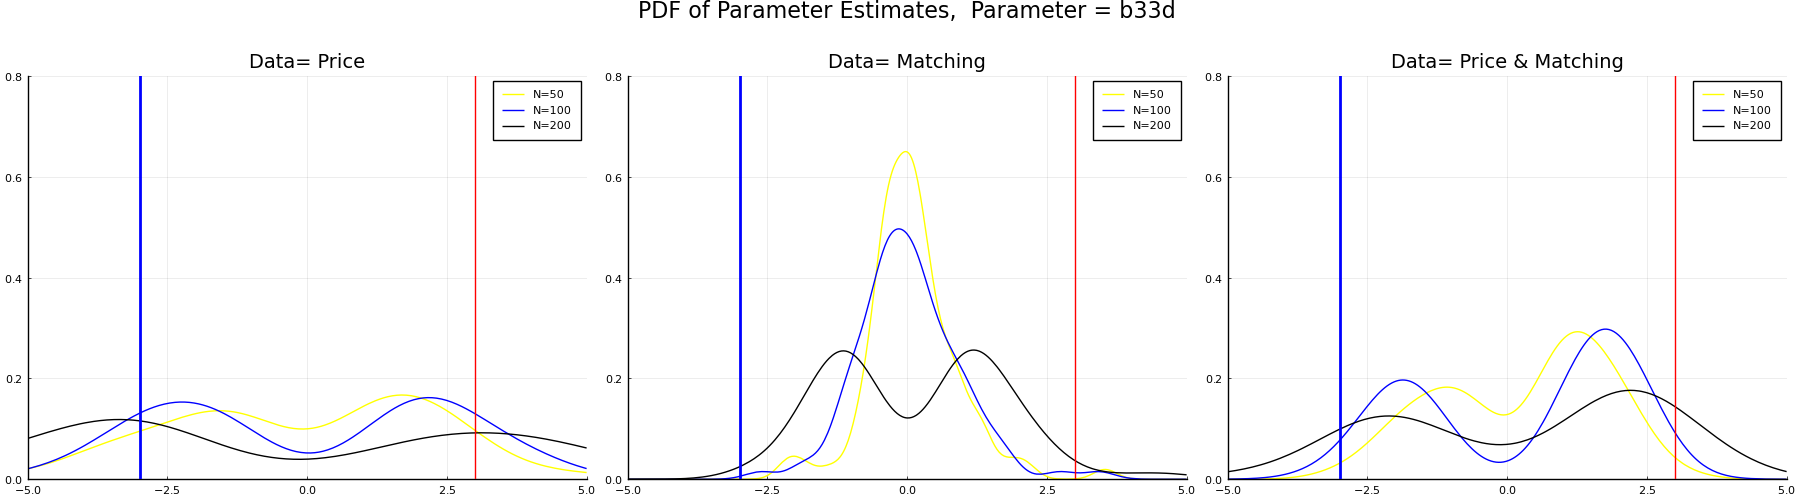

In [1068]:

p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p/est_50_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :yellow, label="N=50", legends=true, title="Data= $((data_label[D]))")
        path="/Users/amir/out/limited_data_3p/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :blue,  label="N=100")
        path="/Users/amir/out/limited_data_3p/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,2]), x), -5,5, color= :black, label="N=200")
        vline!([-3], linewidth = 2, color =:blue, label="")
        vline!([3], linewidth = 1, color =:red, label="")

        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-5,5),size = (1800,500),plot_title="PDF of Parameter Estimates,  Parameter = b33d")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




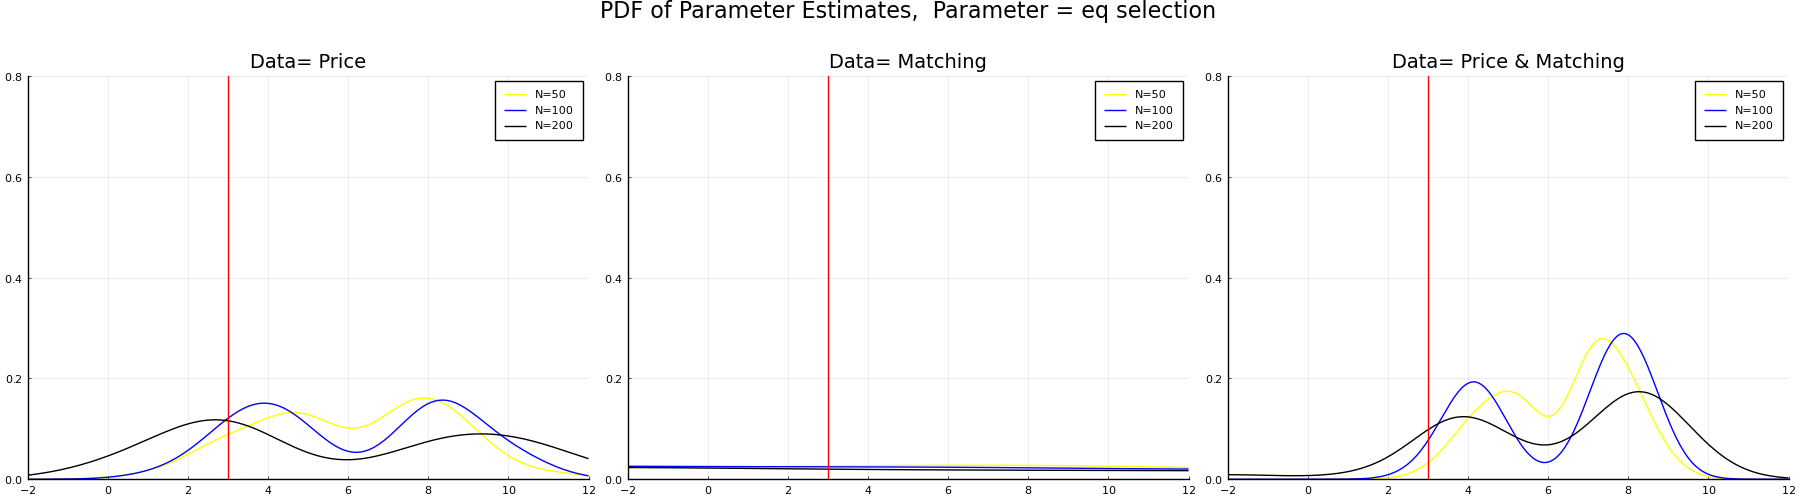

In [1070]:

p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p/est_50_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(fetch_res3p(path)[:,3]), x), -2,12, color= :yellow, label="N=50", legends=true, title="Data= $((data_label[D]))")
        path="/Users/amir/out/limited_data_3p/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,3]), x), -2,12, color= :blue,  label="N=100")
        path="/Users/amir/out/limited_data_3p/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(fetch_res3p(path)[:,3]), x), -2,12, color= :black, label="N=200")
        vline!([3], linewidth = 1, color =:red, label="")

        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-2,12),size = (1800,500),plot_title="PDF of Parameter Estimates,  Parameter = eq selection")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




# Sign of $\beta_{33}^d$ is not identified, fix the sign at the true sign

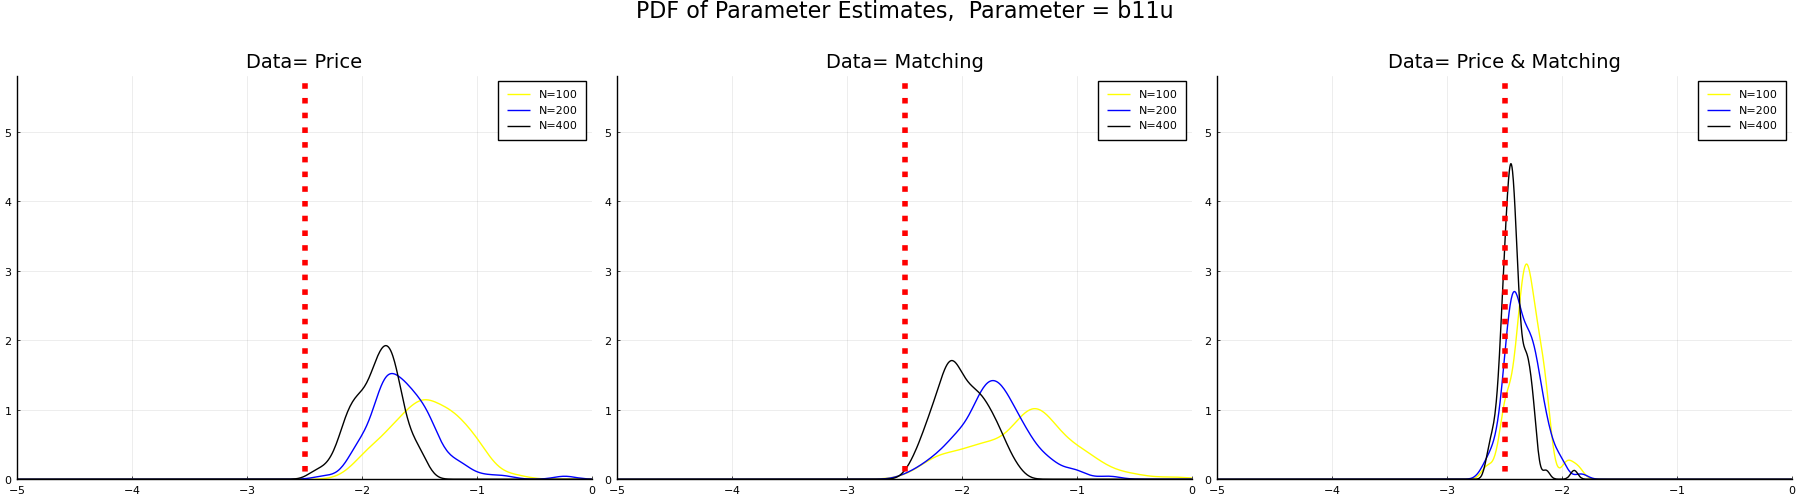

In [1080]:
##### Fixed the sign of b33d 
p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p_sign/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(-abs.(fetch_res3p(path)[:,1])), x), -5,0, color= :yellow, label="N=100", legends=true, title="Data= $((data_label[D]))")
        path="/Users/amir/out/limited_data_3p_sign/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(-abs.(fetch_res3p(path)[:,1])), x), -5,0, color= :blue,  label="N=200")
        path="/Users/amir/out/limited_data_3p_sign/est_400_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(-abs.(fetch_res3p(path)[:,1])), x), -5,0, color= :black, label="N=400")
        vline!([-2.5],  linestyle=:dot, linewidth = 4, color =:red, label="")
#         vline!([3], linewidth = 1, color =:red, label="")

        push!(p_vec,pl )

end 

# plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-5,5),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = b33d")
plot(p_vec[1], p_vec[2],p_vec[3], layout= (1,3), ylims=(0,5.8), xlims=(-5,0),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = b11u")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




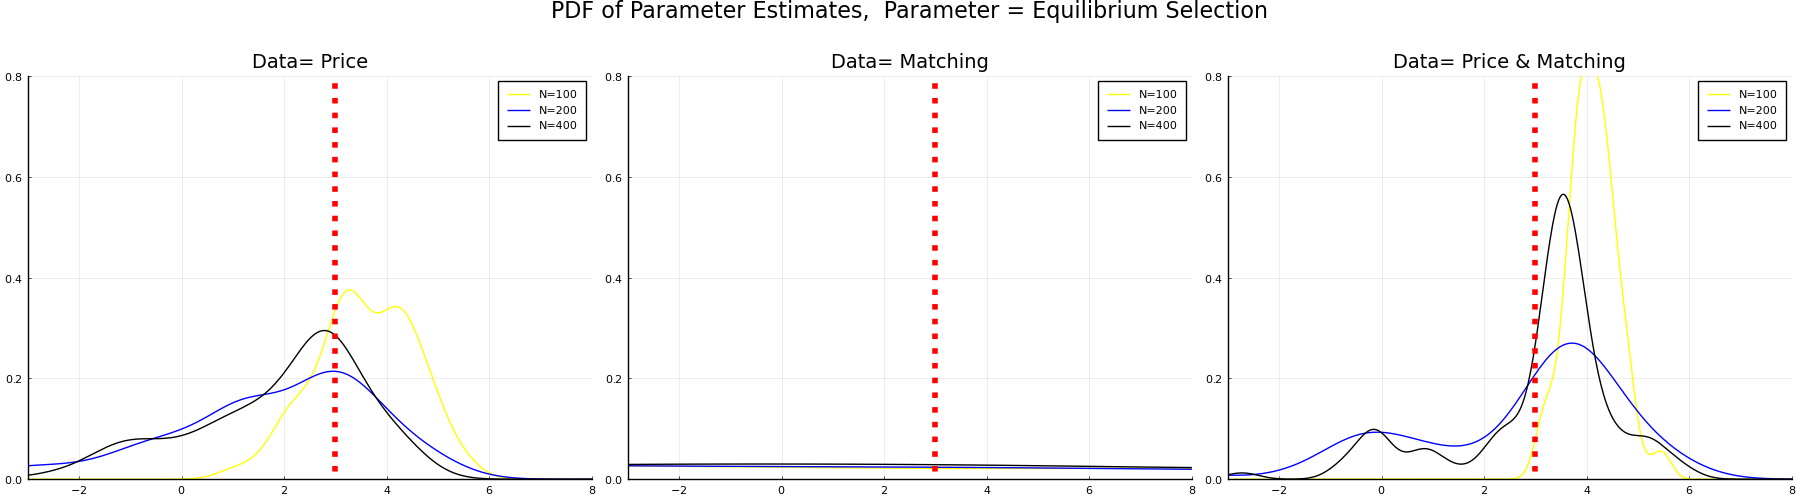

In [1081]:
##### Fixed the sign of b33d, pdf for estimates of the selection rule
p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p_sign/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde((fetch_res3p(path)[:,3])), x), -5,8, color= :yellow, label="N=100", legends=true, title="Data= $((data_label[D]))")
        path="/Users/amir/out/limited_data_3p_sign/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde((fetch_res3p(path)[:,3])), x), -5,8, color= :blue,  label="N=200")
        path="/Users/amir/out/limited_data_3p_sign/est_400_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde((fetch_res3p(path)[:,3])), x), -5,8, color= :black, label="N=400")
        vline!([3.], linestyle=:dot, linewidth = 4, color =:red, label="")
#         vline!([3], linewidth = 1, color =:red, label="")

        push!(p_vec,pl )

end 

plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-3,8),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = Equilibrium Selection")

# plot(p_vec[1], p_vec[2], layout= (1,2), ylims=(0,.8), xlims=(-5,8),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = b33d")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




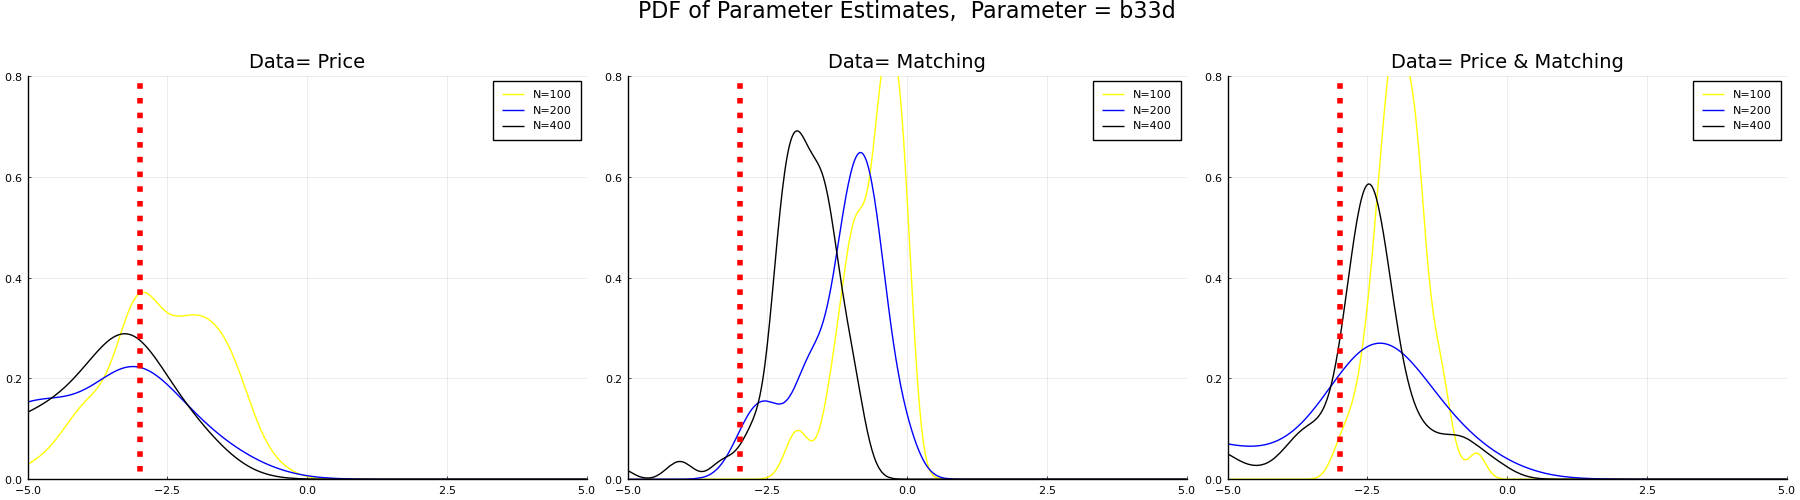

In [1082]:
##### Fixed the sign of b33d 
p_vec = []
data_label = ["Price", "Matching", "Price & Matching"]
for D = 1:1:3
        path="/Users/amir/out/limited_data_3p_sign/est_100_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl = plot(x->pdf(kde(-abs.(fetch_res3p(path)[:,2])), x), -5,5, color= :yellow, label="N=100", legends=true, title="Data= $((data_label[D]))")
        path="/Users/amir/out/limited_data_3p_sign/est_200_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(-abs.(fetch_res3p(path)[:,2])), x), -5,5, color= :blue,  label="N=200")
        path="/Users/amir/out/limited_data_3p_sign/est_400_sim_50_dmode_$(D)_bw_$(BW).bson"
        plot!(x->pdf(kde(-abs.(fetch_res3p(path)[:,2])), x), -5,5, color= :black, label="N=400")
        vline!([-3],  linestyle=:dot, linewidth = 4, color =:red, label="")
#         vline!([3], linewidth = 1, color =:red, label="")

        push!(p_vec,pl )

end 

# plot(p_vec[1], p_vec[2], p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-5,5),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = b33d")
plot(p_vec[1], p_vec[2],p_vec[3], layout= (1,3), ylims=(0,.8), xlims=(-5,5),size = (1800,500), plot_title="PDF of Parameter Estimates,  Parameter = b33d")
# # , xlims = (-5,5), ylims = (1,11),size = (1500,800))
# p2 = plot(x->pdf(kde(fetch_res2(25,25,path1)[:,d]), x), -10,10, color= :blue, legends=false)




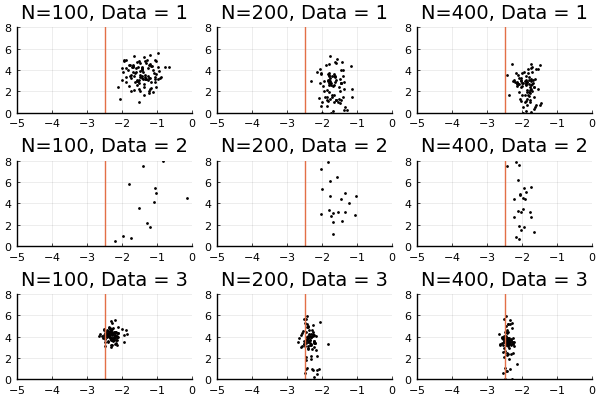

In [774]:

p_vec = []
for D = 1:1:3
    for N in [100, 200,400]
#         path="/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/limited_data_3p/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        path="/Users/amir/out/limited_data_3p_sign/est_$(N)_sim_50_dmode_$(D)_bw_$(BW).bson"
        pl= scatter(-abs.(fetch_res3p(path)[:,1]),fetch_res3p(path)[:,3], markersize =1,legends=false,color=:red, title="N=$(N), Data = $(D)" )
        vline!([-2.5])
#         hline!([3])
        push!(p_vec,pl )
    end
end 
# plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6] , layout= (3,2), xlims=(-4,0), ylims=(1,11))
# , ylims=(-10,10), xlims=(-4,0))

plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6],p_vec[7], p_vec[8], p_vec[9] , layout= (3,3), ylims=(0,8), xlims=(-5,0))
# plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6] , layout= (3,2),  ylims=(-20,20), xlims=(-20,0))

# plot(p_vec[1], p_vec[2], p_vec[3],p_vec[4], p_vec[5], p_vec[6] , layout= (2,3), ylims=(-3,2), xlims=(-3,0))
# , xlims = (-5,5), ylims = (1,11),size = (1500,800))




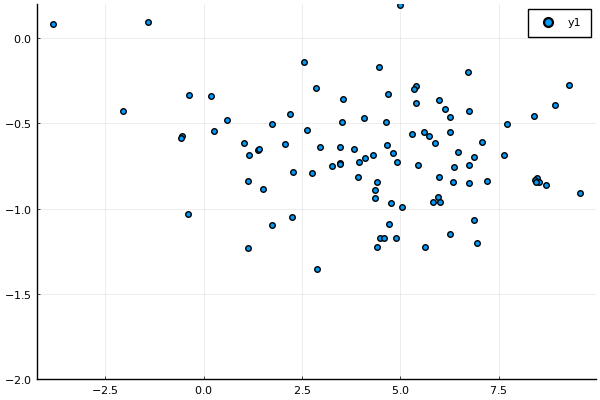

In [781]:
scatter(est[:,10], est[:,11], ylims=(-2,.2))

In [1087]:
res = BSON.load("/Users/amir/out/10p/est_50_sim_50_dmode_3.bson")
est_50_2 = reduce(vcat, res["beta_hat"]);
res = BSON.load("/Users/amir/out/10p/est_100_sim_50_dmode_3.bson")
est_100_2 = reduce(vcat, res["beta_hat"]);
# pretty_table(est_50_2);

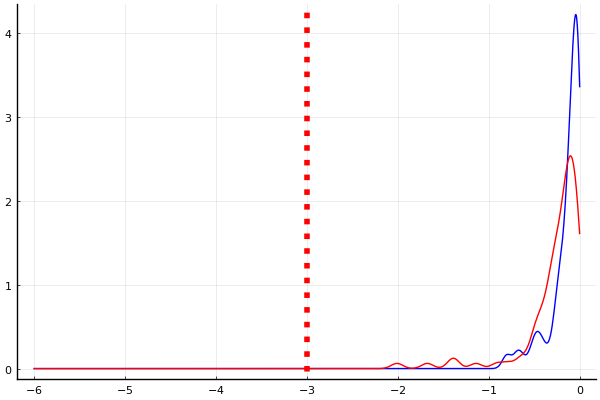

In [899]:
# Plotting true pars 

# scatter(est_100_2[:,1], est_100[:,1], lims=(-3,0))
true_pars = [-2.5, 1.5, -1.5, -.5, 3.5, 2.5, 1.5, 3, -3, 3.]
d= 9

plot(x->pdf(kde(est_50_2[:,d]), x), true_pars[d]-3.,true_pars[d]+3., color= :blue, legends=false)
plot!(x->pdf(kde(est_100_2[:,d]), x),  true_pars[d]-3.,true_pars[d]+3., color= :red, legends=false)
vline!([true_pars[d]], linestyle=:dot, linewidth = 4, color =:red, label="")
# println(round.(mean(est_100,dims=1), digits=1))
# println(round.(mean(est_100_2,dims=1), digits=1))
# println(true_pars)




In [1084]:
function res_fun(PATH, true_pars, verbose=:false)
    out = BSON.load(PATH)["beta_hat"]
    est = reduce(vcat,out)[:,1:10]
    
    fit = reduce(vcat,out)[:,11]
    if verbose==true
        for i = 1:size(est)[1]
            println("Pars: ", round.(est[i,:], digits=2), " Fitness: ", round.(fit[i], digits=2))
            sleep(0.1)
        end
    end

    bias = mean(est, dims=1) -true_pars'

    MSE = sqrt.(mean((est .- true_pars').^2, dims=1))
#     m_h = mean(bw, dims=1)

    pars10 = ["b11u", "b12u", "b21u", "b22u", "b11d", "b12d", "b21d", "b13u", "b33d", "eqsel", "llike"];
    est = hcat(est, fit);

    est_df = DataFrame(est, pars10);
    return est_df, bias, MSE
end



res_fun (generic function with 2 methods)

In [1165]:
path = "/Users/amir/out/10p/est_50_sim_50_dmode_3.bson"
res_50, bias_50, RMSE_50 = res_fun(path, true_pars);


path = "/Users/amir/out/10p/est_100_sim_50_dmode_3.bson"
res_100, bias_100, RMSE_100 = res_fun(path, true_pars);


path = "/Users/amir/out/10p/est_200_sim_50_dmode_3.bson"
res_200, bias_200, RMSE_200 = res_fun(path, true_pars);

In [1163]:


bias_mat = [hcat(bias_50, "N=50"); 
            hcat(bias_100, "N=100");
            hcat(bias_200, "N=200")];

pars_bias = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", 
            "Sample Size"];
println("bias: ")

bias_df = DataFrame(bias_mat, pars_bias);
pretty_table(bias_df, formatters = ft_printf("%5.3f",1:10)) # displaying 10 estimations



RMSE_mat = [hcat(RMSE_50, "N=50"); 
            hcat(RMSE_100, "N=100");
            hcat(RMSE_200, "N=200")]

pars_RMSE = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", 
            "Sample Size"];
println("RMSE: ")

RMSE_df = DataFrame(RMSE_mat, pars_RMSE);
pretty_table(RMSE_df, formatters = ft_printf("%5.3f",1:10)) # displaying 10 estimations


bias: 
┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬───────────┬────────────┬─────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=3.0 │ b33d=-3.0 │ eqsel==3.0 │ Sample Size │
│       Any │      Any │       Any │       Any │      Any │      Any │      Any │      Any │       Any │        Any │         Any │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┼────────────┼─────────────┤
│     0.090 │   -0.666 │     0.040 │    -0.014 │   -1.016 │   -1.920 │    0.536 │   -2.929 │     2.851 │      0.475 │        N=50 │
│    -0.127 │   -0.619 │     0.115 │    -0.015 │   -0.890 │   -1.953 │    0.286 │   -2.804 │     2.728 │      0.175 │       N=100 │
│     0.088 │    0.931 │     0.354 │    -1.385 │   -1.378 │    0.364 │    0.807 │   -1.095 │     1.152 │      0.965 │       N=200 │
└───────────┴──────────┴───────────┴───────────┴──────────┴──────────

In [1162]:
true_pars =  [-2.5, 1.5, -1.5, -.5, 3.5, 2.5, 1.5, 3, -3, 3]
path = "/Users/amir/out/median-restb33/"*
                "est_50_sim_50_b33.bson"
b33_res_100_50, b33_bias_100_50, b33_RMSE_100_50 = res_fun(path, true_pars);


LoadError: BoundsError: attempt to access 864-element Vector{Float64} at index [1:864, 1:10]

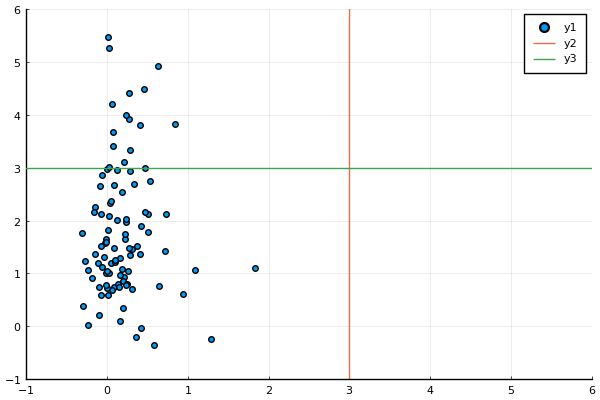

In [993]:
scatter(res_100[:,8],res_200[:,8], lims=(-1,6))
vline!([3])
hline!([3])
# ,xlims=(-5,1), ylims=((-5,1)))

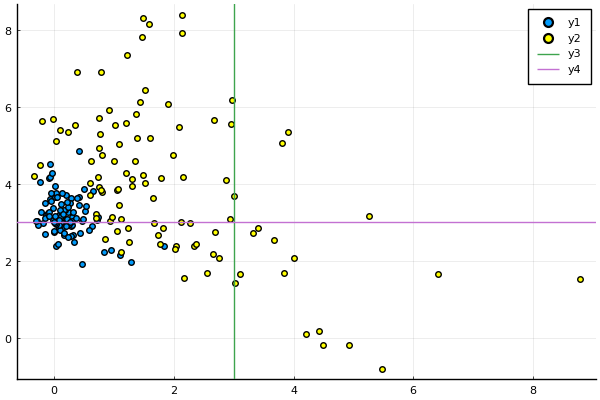

In [1019]:
scatter(res_100[:,8],res_100[:,10])
scatter!(res_200[:,8],res_200[:,10], color = :yellow)

# scatter!(res_50[:,10],res_50[:,11], xlims=(-1,8))

vline!([3])
hline!([3])


In [1108]:
b33_res_100_50

,b11u,b12u,b21u,b22u,b11d,b12d,b21d,b13u
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-3.32983,1.90506,-0.791788,-1.3537,2.75559,1.29654,2.06839,3.18948
2,-1.22811,1.07446,-1.91515,-0.31489,3.25261,1.88912,2.70407,1.10375
3,-2.14758,1.14294,-1.37897,-0.474868,3.62423,1.15226,2.06396,1.77689
4,-2.16329,0.735218,-1.20141,-0.419468,3.15069,0.744778,2.70412,2.04782
5,2.606,1.76428,-4.33609,-1.61749,-1.4074,4.81641,4.5518,1.67274
6,-1.5583,1.79771,-1.71862,-1.07698,2.48361,2.67884,2.68929,1.51482
7,-3.30264,1.23422,-0.944056,-0.895532,2.40261,0.703853,1.85165,1.39835
8,-3.03413,0.973859,-1.21038,-0.560208,3.11767,1.18632,2.02202,2.64798
9,-2.44163,0.754026,-1.40402,-0.646,2.49427,0.211502,2.26482,2.01758


In [1119]:
d=1

1

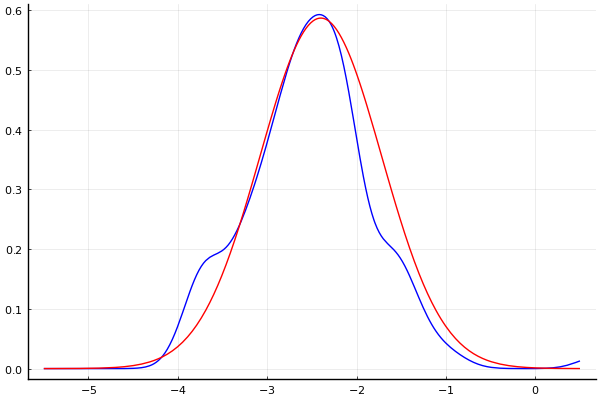

In [1154]:
using Distributions
plot(x->pdf(kde(b33_res_100_50[:,d]), x), true_pars[d]-3.,true_pars[d]+3., color= :blue, legends=false)
plot!(x->pdf(Normal(-2.4, .68),x), true_pars[d]-3.,true_pars[d]+3., color= :red, legends=false)


In [1172]:
R"""
library(mvnormalTest)
mhz($(res_200))
"""

RObject{VecSxp}
$mv.test
[1] 400

$uv.shapiro
      W      p-value UV.Normality
b11u  0.9785 0.1011  Yes         
b12u  0.8892 0       No          
b21u  0.8931 0       No          
b22u  0.7983 0       No          
b11d  0.9208 0       No          
b12d  0.9303 1e-04   No          
b21d  0.845  0       No          
b13u  0.8837 0       No          
b33d  0.8446 0       No          
eqsel 0.9865 0.4071  Yes         
llike 0.9756 0.06    Yes         



In [1166]:
res_50

,b11u,b12u,b21u,b22u,b11d,b12d,b21d,b13u
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-3.84469,1.1575,-0.743386,-0.42694,3.87949,-0.100058,1.15623,0.624199
2,-2.10894,0.340329,-1.75295,0.04654,2.61219,0.157122,1.91279,-0.00591883
3,-0.986402,0.537858,-2.67224,-0.47157,1.25825,0.96818,2.88861,-0.148756
4,-2.2835,0.369985,-1.38197,-0.105792,2.89805,0.175616,2.14376,-0.0733244
5,-2.29113,0.648116,-1.59422,-0.277344,2.54633,0.65289,1.80976,-0.0122597
6,-2.14476,0.484258,-1.81787,-0.191985,2.49198,0.454491,2.03528,0.0847837
7,-2.96896,0.627757,-1.29035,-0.236278,2.88491,0.160319,1.6107,-0.0372836
8,-2.3519,0.755426,-1.66539,-0.443734,2.20706,0.645843,1.96075,0.0857843
9,-2.53533,0.779224,-1.29331,-0.638439,2.16095,-0.0561778,2.1672,-0.396499


In [ ]:
[0.06500134634085744, -0.0013084579599900558, -0.003798345894287896, -0.010221671966535905, -0.016872507593633138, -0.016993096818560413, -0.016994187984550303, -0.01794959063622049, -0.019237084794285705, -0.01966789337445498, -0.023420705294792614, -0.02343160105639746, -0.024048344792971795, -0.025194969654859636, -0.027005787682852, -0.02826702758623391, -0.028760919528490296, -0.02953881825172147, -0.03072029345536338, -0.031141700511542903, -0.03259422707826667, -0.03288891178082369, -0.0339705055903198, -0.034514469769931104, -0.03456617559394429, -0.035186777623833224, -0.035688226156400514, -0.03644173180191881, -0.03676372523575331, -0.036765377993426406, -0.03759964115419446, -0.0377201463231839, -0.038170034381939145, -0.038931710705544534, -0.03905582393786609, -0.039169821969537805, -0.03929889671179625, -0.03979481019210855, -0.04036245013030849, -0.04076270152451277, -0.04080359866341388, -0.04140985434101267, -0.04221037278682637, -0.042366118405387024, -0.043978118879699775, -0.04528406009521315, -0.04661696581054483, -0.04775316321412766, -0.04782816063526256, -0.04859518837462587]